**import packages**

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

**Load the Dataset**

let's load the dataset into a Pandas DataFrame.

In [6]:
# Load the Marketing_Agency dataset
Marketing_Agency_data = pd.read_excel('Marketing_Agency_Segmentation_Churn_Predictive_Analytics.xlsx')

# Display the first few rows to understand the data structure
Marketing_Agency_data.head()

,CustomerID,Transaction_Date,Age,Gender,Income_Level,Source,Purchase_Amount,Website_Visits,Avg_Session_Duration,Pages_Viewed_per_Visit,Rating
0,170-52-0309,2023-01-02,23,Female,Low,Search,343.052403,37,22.483131,1.005978,4.766671
1,898-57-4080,2023-01-02,62,Male,Low,Twitter,386.925038,18,6.480885,9.527629,2.018594
2,226-53-4855,2023-01-02,25,Non-Binary,Low,Facebook,490.135511,85,108.679724,1.471663,4.640526
3,162-64-6607,2023-01-02,63,Female,Medium,Display,215.486064,23,7.212651,7.934850,1.885569
4,729-56-3399,2023-01-02,59,Non-Binary,High,Display,435.221594,50,62.265141,2.059306,4.424469


# UNDERSTANDING THE DATA

In [7]:
# knowing its shape
Marketing_Agency_data.shape

(104670, 11)

In [8]:
# Get an overview of the dataset
print(Marketing_Agency_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104670 entries, 0 to 104669
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CustomerID              104670 non-null  object        
 1   Transaction_Date        104670 non-null  datetime64[ns]
 2   Age                     104670 non-null  int64         
 3   Gender                  104670 non-null  object        
 4   Income_Level            104670 non-null  object        
 5   Source                  104670 non-null  object        
 6   Purchase_Amount         104670 non-null  float64       
 7   Website_Visits          104670 non-null  int64         
 8   Avg_Session_Duration    104670 non-null  float64       
 9   Pages_Viewed_per_Visit  104670 non-null  float64       
 10  Rating                  104670 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 8.8+ MB
None


In [9]:
# Summary statistics
print(Marketing_Agency_data.describe())

                    Transaction_Date            Age  Purchase_Amount  \
count                         104670  104670.000000    104670.000000   
mean   2023-07-04 03:35:15.012897792      43.468663       275.044960   
min              2023-01-02 00:00:00      18.000000        50.002720   
25%              2023-04-04 00:00:00      31.000000       162.435213   
50%              2023-07-04 00:00:00      43.000000       275.477999   
75%              2023-10-04 00:00:00      56.000000       387.584543   
max              2024-01-02 00:00:00      69.000000       499.995230   
std                              NaN      15.024871       129.906597   

       Website_Visits  Avg_Session_Duration  Pages_Viewed_per_Visit  \
count   104670.000000         104670.000000           104670.000000   
mean        49.389548             62.543677                5.498886   
min          0.000000              5.002473                1.000200   
25%         24.000000             33.571965                3.247540

In [10]:
# Get an overview of the dataset
print(Marketing_Agency_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104670 entries, 0 to 104669
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CustomerID              104670 non-null  object        
 1   Transaction_Date        104670 non-null  datetime64[ns]
 2   Age                     104670 non-null  int64         
 3   Gender                  104670 non-null  object        
 4   Income_Level            104670 non-null  object        
 5   Source                  104670 non-null  object        
 6   Purchase_Amount         104670 non-null  float64       
 7   Website_Visits          104670 non-null  int64         
 8   Avg_Session_Duration    104670 non-null  float64       
 9   Pages_Viewed_per_Visit  104670 non-null  float64       
 10  Rating                  104670 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 8.8+ MB
None


In [11]:
# knowing the number of unique values in each feature variable
Marketing_Agency_data.nunique()

,0
CustomerID,10000
Transaction_Date,366
Age,52
Gender,3
Income_Level,3
Source,6
Purchase_Amount,104670
Website_Visits,100
Avg_Session_Duration,104670
Pages_Viewed_per_Visit,104670


# **Data Cleaning**

Before visualizing, we should clean the data:

Handle missing values.
Ensure data types are correct.
Create any necessary features.

In [12]:
# Check for missing values
print(Marketing_Agency_data.isnull().sum())

CustomerID                0
Transaction_Date          0
Age                       0
Gender                    0
Income_Level              0
Source                    0
Purchase_Amount           0
Website_Visits            0
Avg_Session_Duration      0
Pages_Viewed_per_Visit    0
Rating                    0
dtype: int64


In [13]:
# checking for redundancy
Marketing_Agency_data.duplicated().sum()

0

In [14]:
# checking whether Purchase_Amount having zeros in it
(Marketing_Agency_data[['Purchase_Amount', 'CustomerID']] == 0).sum()

,0
Purchase_Amount,0
CustomerID,0


# **Process the Data**

We explore the data to understand the key features, such as Gender, Income_Level, Source, etc.

convert categorical data into numeric

In [15]:
# Check the distribution of the Gender, Source and Income_Level columns
print(Marketing_Agency_data['Gender'].value_counts())
print(Marketing_Agency_data['Income_Level'].value_counts())
print(Marketing_Agency_data['Source'].value_counts())

Gender
Male          35117
Female        35114
Non-Binary    34439
Name: count, dtype: int64
Income_Level
Medium    35395
High      35086
Low       34189
Name: count, dtype: int64
Source
Facebook    18226
TikTok      18183
Display     17471
Search      17042
Twitter     16912
YouTube     16836
Name: count, dtype: int64


To explore the relationship between Gender and Income_Level, you can perform several steps to visualize and analyze the data:

Convert the 'Gender' Column to Numeric: Ensure 'Gender' is numeric (0 for 'Male', 1 for 'Female', 2 for 'Non-Binary').

In [16]:
Marketing_Agency_data['Gender'].unique()

array(['Female', 'Male', 'Non-Binary'], dtype=object)

In [17]:
Marketing_Agency_data['Income_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [18]:
Marketing_Agency_data['Source'].unique()

array(['Search', 'Twitter', 'Facebook', 'Display', 'TikTok', 'YouTube'],
      dtype=object)

In [19]:
# Convert 'Gender' column to numeric (2 for 'Non-Binary', 1 for 'Male', 0 for 'Female')
Marketing_Agency_data['Gender_num'] = Marketing_Agency_data['Gender'].map({'Female': 0, 'Male': 1, 'Non-Binary': 2})

In [24]:
# Convert 'Income_Level' column to numeric (2 for 'High', 1 for 'Medium', 0 for 'Low')
Marketing_Agency_data['Income_Level_num'] = Marketing_Agency_data['Income_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [25]:
# Convert 'Source' column to numeric (5 for 'YouTube', 4 for 'TikTok', 3 for 'Display', 2 for 'Search', 1 for 'Twitter', 0 for 'Facebook')
Marketing_Agency_data['Source_num'] = Marketing_Agency_data['Source'].map({'Facebook': 0, 'Twitter': 1, 'Search': 2, 'Display': 3, 'TikTok': 4, 'YouTube': 5})

# **Data Exploration**


In [26]:
Marketing_Agency_data.head()

,CustomerID,Transaction_Date,Age,Gender,Income_Level,Source,Purchase_Amount,Website_Visits,Avg_Session_Duration,Pages_Viewed_per_Visit,Rating,Gender_num,Source_num,Income_Level_num
0,170-52-0309,2023-01-02,23,Female,Low,Search,343.052403,37,22.483131,1.005978,4.766671,0,2,0
1,898-57-4080,2023-01-02,62,Male,Low,Twitter,386.925038,18,6.480885,9.527629,2.018594,1,1,0
2,226-53-4855,2023-01-02,25,Non-Binary,Low,Facebook,490.135511,85,108.679724,1.471663,4.640526,2,0,0
3,162-64-6607,2023-01-02,63,Female,Medium,Display,215.486064,23,7.212651,7.934850,1.885569,0,3,1
4,729-56-3399,2023-01-02,59,Non-Binary,High,Display,435.221594,50,62.265141,2.059306,4.424469,2,3,2


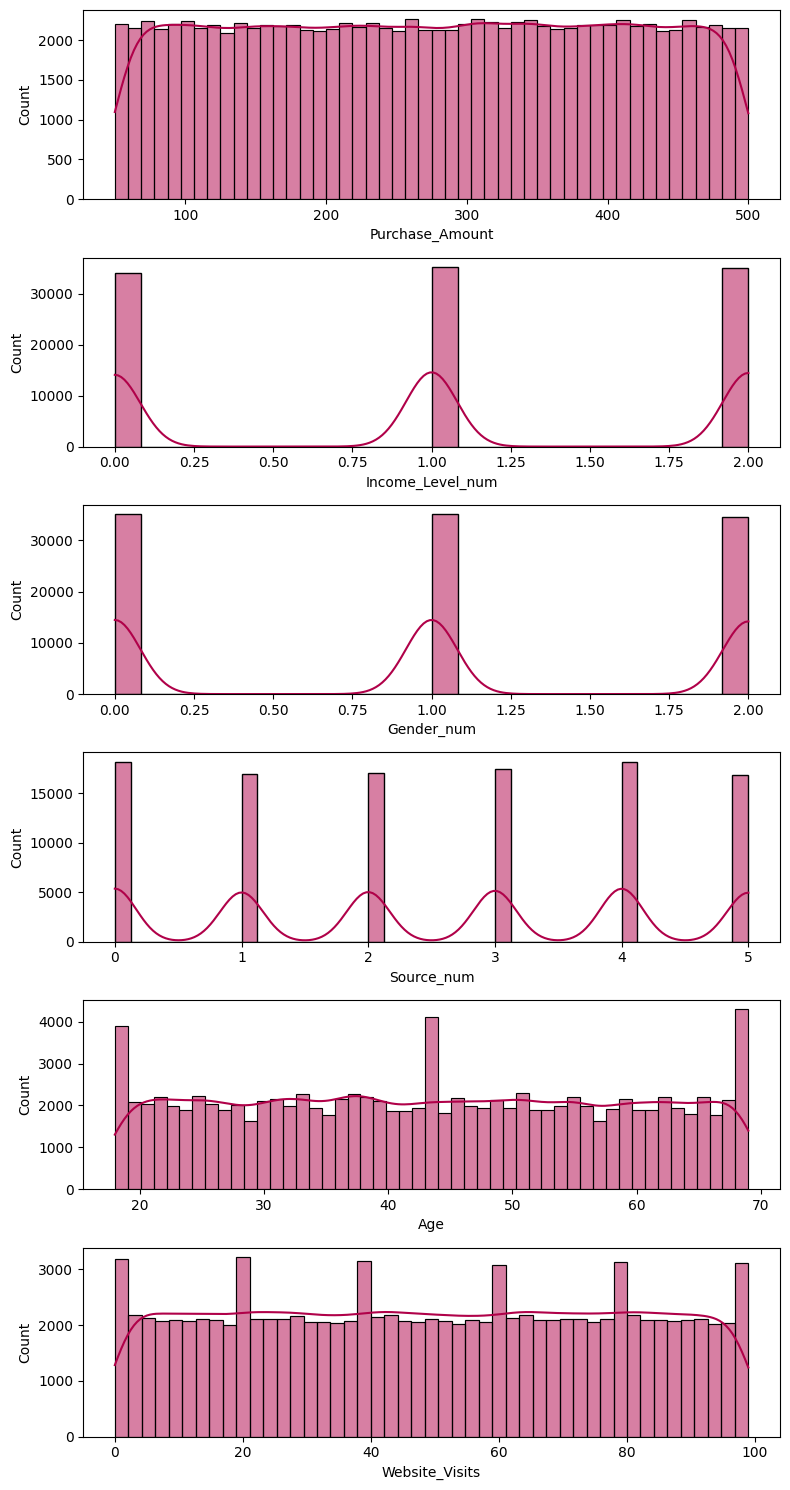

In [27]:
# visualizing the distribution of feature variables with histplot
fig, axis = plt.subplots(6,1, figsize= (8,15))

for i,feature in enumerate(['Purchase_Amount', 'Income_Level_num', 'Gender_num', 'Source_num', 'Age', 'Website_Visits']):
    sns.histplot(x= feature, data= Marketing_Agency_data, kde= True, ax= axis[i], color= '#b00149')

plt.tight_layout()
plt.show()

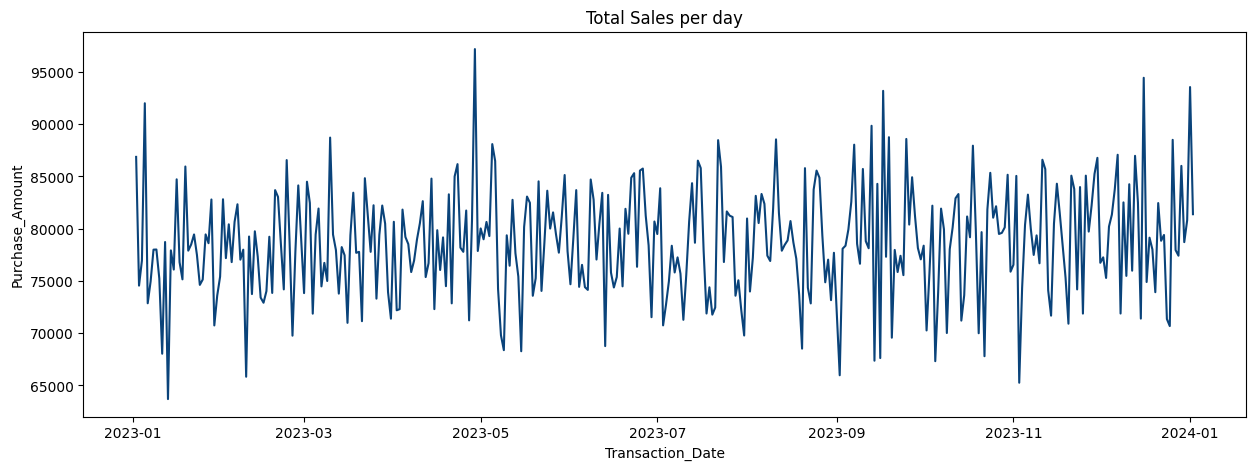

In [28]:
# visualizing total sales perday using lineplot
sales_perday = Marketing_Agency_data.groupby('Transaction_Date')['Purchase_Amount'].sum().sort_values(ascending= False).to_frame().reset_index()

plt.figure(figsize= (15,5))
sns.lineplot(x= 'Transaction_Date', y= 'Purchase_Amount', data= sales_perday, color= '#0a437a')
plt.title('Total Sales per day')
plt.show()

<ipython-input-29-ebd5df6dc5f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'CustomerID', data= Marketing_Agency_data, order= top10_customer,  palette= 'crest')


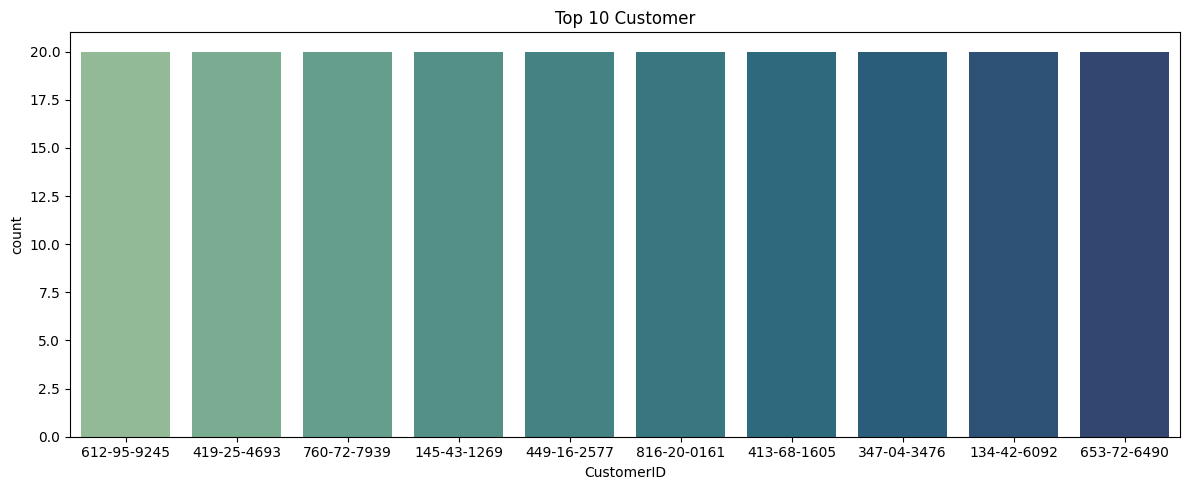

In [29]:
# visualizing top 10 frequent customer using countplot
top10_customer = Marketing_Agency_data['CustomerID'].value_counts().head(10).index

plt.figure(figsize= (12,5))
sns.countplot(x= 'CustomerID', data= Marketing_Agency_data, order= top10_customer,  palette= 'crest')
plt.title('Top 10 Customer')
plt.tight_layout()
plt.show()

<ipython-input-30-e6cb28622f9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'CustomerID', y= 'Purchase_Amount', data= top10_sales, order= top10_sales_index,  palette= 'rocket')


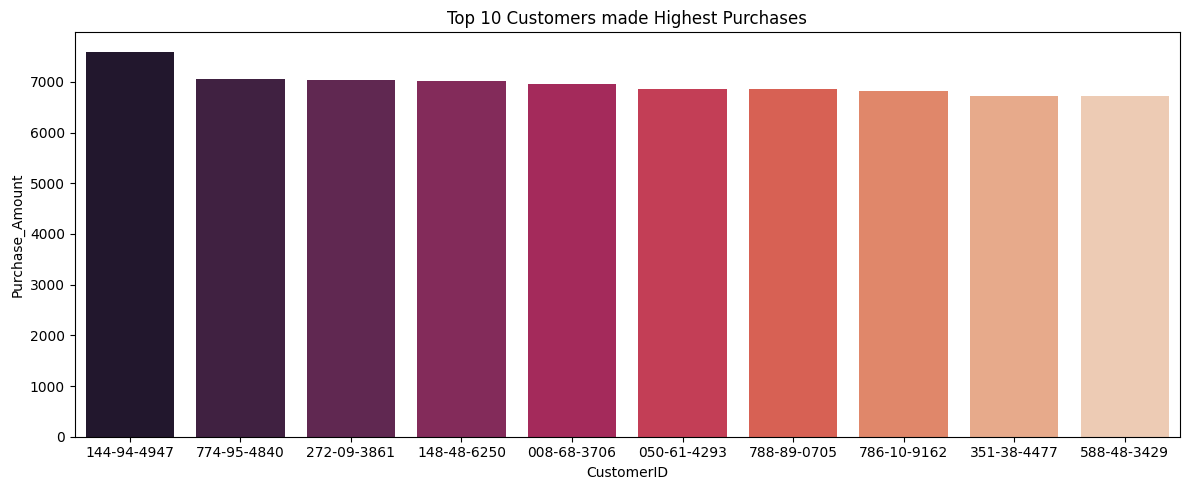

In [30]:
# visualizing top 10 products that made high revenue using barplot
top10_sales = Marketing_Agency_data.groupby('CustomerID')['Purchase_Amount'].sum().sort_values(ascending= False).head(10).to_frame().reset_index()
top10_sales_index = list(top10_sales['CustomerID'])

plt.figure(figsize= (12,5))
sns.barplot(x= 'CustomerID', y= 'Purchase_Amount', data= top10_sales, order= top10_sales_index,  palette= 'rocket')
plt.title('Top 10 Customers made Highest Purchases')
plt.tight_layout()
plt.show()

In [ ]:
# understanding the relationship between each feature variables using pairplot
sns.pairplot(data= Marketing_Agency_data, hue= 'Purchase_Amount', palette= 'crest')
plt.show()

*   Darker and larger dots represent higher purchase amounts (480), while lighter and smaller dots represent lower amounts (80).
*   **Interpretation**: No strong visible correlation between the size of dots and most pairs of variables. This suggests that purchase amount may not be strongly driven by any single variable here.
*   **Distribution of Rating**: The distribution shows that most customers have ratings clustered around the center.
*   **Minimal Correlations**: There don’t seem to be any obvious linear correlations between any pairs of variables.


## History Data

- Splitting the whole dataset into two parts.

   *   first part without last 3 months of transactions
   *   second part with only last 3 months of transactions

In [32]:
# getting the latest invoice date in the dataset
latest_invoice_date = Marketing_Agency_data['Transaction_Date'].max()
latest_invoice_date

Timestamp('2024-01-02 00:00:00')

In [33]:
# invoice date before three months of latest date
mon3_ret_date = pd.Timestamp('2023-10-02')
mon3_ret_date

Timestamp('2023-10-02 00:00:00')

In [35]:
# taking the first part of data that doesn't have last 3 months of transaction

df_part1 = Marketing_Agency_data.copy() # creating copy
df_part1.set_index('Transaction_Date', inplace= True) # setting Date as index
df_part1 = df_part1.loc[:'2023-10-02'] # slicing the data

In [36]:
# reseting the index
df_part1.reset_index(inplace= True) # restore the default integer index (0, 1, 2, ...).

In [37]:
# viewing the data of df_part1
df_part1.head()

,Transaction_Date,CustomerID,Age,Gender,Income_Level,Source,Purchase_Amount,Website_Visits,Avg_Session_Duration,Pages_Viewed_per_Visit,Rating,Gender_num,Source_num,Income_Level_num
0,2023-01-02,170-52-0309,23,Female,Low,Search,343.052403,37,22.483131,1.005978,4.766671,0,2,0
1,2023-01-02,898-57-4080,62,Male,Low,Twitter,386.925038,18,6.480885,9.527629,2.018594,1,1,0
2,2023-01-02,226-53-4855,25,Non-Binary,Low,Facebook,490.135511,85,108.679724,1.471663,4.640526,2,0,0
3,2023-01-02,162-64-6607,63,Female,Medium,Display,215.486064,23,7.212651,7.934850,1.885569,0,3,1
4,2023-01-02,729-56-3399,59,Non-Binary,High,Display,435.221594,50,62.265141,2.059306,4.424469,2,3,2


# RFM Analysis

RFM analysis is a customer segmentation technique used in marketing and customer relationship management. It stands for Recency, Frequency, and Monetary value, which are three key metrics used to evaluate and segment customers based on their purchasing behavior.

In [38]:
# knowing the number of customers in df_part1
df_part1['CustomerID'].nunique()

9847

In [39]:
# Convert 'Transaction_Date' to datetime, coercing errors
df_part1['Transaction_Date'] = pd.to_datetime(df_part1['Transaction_Date'], errors='coerce')

In [40]:
# getting the latest transaction Transaction_Date in df_part1
df_part1_latest_date = df_part1['Transaction_Date'].max()
df_part1_latest_date

Timestamp('2023-10-02 00:00:00')

## Recency

*   **Definition**: How recently a customer has made a purchase.

*   **Importance**: Customers who have purchased recently are more likely to buy again than those who haven't purchased in a while.

*   **Calculation**: The number of days since the customer's last purchase. For instance, if today’s date is October 30, and a customer’s last purchase was on October 15, the recency is 15 days.




In [41]:
# calculating the recency of each customer

recency = df_part1.groupby('CustomerID').agg({'Transaction_Date': lambda x :
                                              (df_part1_latest_date - x.max()).days}).reset_index() # calculating recency

recency.rename(columns= {'Transaction_Date':'Recency'}, inplace= True) # renaming columns
recency

,CustomerID,Recency
0,001-10-4098,6
1,001-15-9190,43
2,001-18-5250,1
3,001-30-4678,59
4,001-47-2621,32
...,...,...
9842,899-54-5644,9
9843,899-56-0243,8
9844,899-65-3464,13
9845,899-87-9859,21


## Frequency

*   **Definition**: How often a customer makes a purchase over a given period.

*  **Importance**: Customers who purchase more frequently are generally more loyal and may have a higher lifetime value.

*   **Calculation**: The total number of purchases made by the customer during a specified period. For example, if a customer made 5 purchases in the last year, their frequency score would be 5.

In [42]:
# calculating the frequency of each customer

frequency = df_part1.groupby('CustomerID').agg({'CustomerID':'count'}) # calculating frequency

frequency.rename(columns= {'CustomerID':'Frequency'}, inplace= True) # renaming columns
frequency.reset_index(inplace= True) # resetting index

frequency

,CustomerID,Frequency
0,001-10-4098,12
1,001-15-9190,4
2,001-18-5250,11
3,001-30-4678,8
4,001-47-2621,9
...,...,...
9842,899-54-5644,7
9843,899-56-0243,2
9844,899-65-3464,9
9845,899-87-9859,8


## Monetary

*   **Definition**: How much money a customer spends on purchases.
*   **Importance**: Customers who spend more are more valuable to the business. This metric helps in identifying high-value customers.
*   **Calculation**: The total amount spent by the customer during a specific period. For instance, if a customer spent R696 over the last year, their monetary value is R696.





In [43]:
# calculating the monetary of each customer

monetary = df_part1.groupby('CustomerID').agg({'Purchase_Amount':'sum'}).reset_index() # calculting monetary

monetary.rename(columns= {'Purchase_Amount':'Monetary'}, inplace= True) # renaming columns
monetary

,CustomerID,Monetary
0,001-10-4098,4150.701126
1,001-15-9190,696.823080
2,001-18-5250,3191.473809
3,001-30-4678,1808.744042
4,001-47-2621,2392.049450
...,...,...
9842,899-54-5644,1904.336935
9843,899-56-0243,673.718962
9844,899-65-3464,2874.491878
9845,899-87-9859,1792.745920


In [44]:
# creating a new dataframe RFM with recency, frequency and monetary of each customer
RFM = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
RFM

,CustomerID,Recency,Frequency,Monetary
0,001-10-4098,6,12,4150.701126
1,001-15-9190,43,4,696.823080
2,001-18-5250,1,11,3191.473809
3,001-30-4678,59,8,1808.744042
4,001-47-2621,32,9,2392.049450
...,...,...,...,...
9842,899-54-5644,9,7,1904.336935
9843,899-56-0243,8,2,673.718962
9844,899-65-3464,13,9,2874.491878
9845,899-87-9859,21,8,1792.745920


In [45]:
# describing feature variables of RFM dataframe
RFM.describe()

,Recency,Frequency,Monetary
count,9847.000000,9847.000000,9847.000000
mean,43.774043,7.937544,2182.163230
std,51.536638,4.467235,1284.308550
min,0.000000,1.000000,52.463728
25%,10.000000,4.000000,1091.833778
50%,25.000000,8.000000,2111.418437
75%,56.000000,12.000000,3172.720831
max,273.000000,20.000000,6540.681451


<ipython-input-46-10cde7b3f559>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= RFM[feature], kde= True, ax= axis[i], color= '#7e4071', axlabel= feature)
<ipython-input-46-10cde7b3f559>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= RFM[feature], kde= True, ax= axis[i], color= '#7e4071'

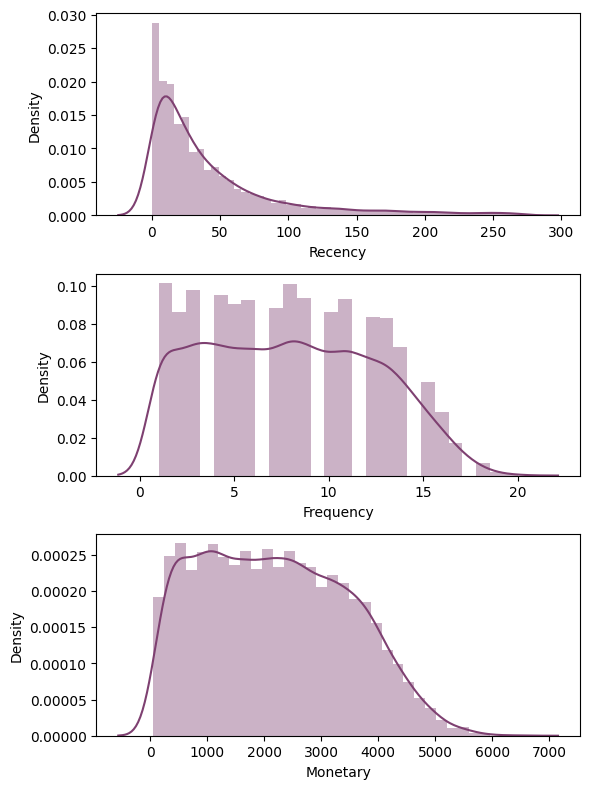

In [46]:
# visualizing the distribution of feature variables in RFM dataframe using distplot
fig, axis = plt.subplots(3,1, figsize= (6,8))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.distplot(x= RFM[feature], kde= True, ax= axis[i], color= '#7e4071', axlabel= feature)

plt.tight_layout()
plt.show()



*   **Recency Score (R_Score)**: Assigned scores based on the recency of transactions, where lower recency (more recent transactions) receives a higher score.

*   **Frequency Score (F_Score)**: Assigned scores based on the number of transactions, where higher frequency receives a higher score.

*   **Monetary Score (M_Score)**: Assigned scores based on the total spend, where higher spend receives a higher score.

In [47]:
# sorting the recency, frequency and monetary values of customers into bins using pd.cut() to get their respective scores

RFM['R_Score'] = pd.cut(RFM['Recency'], bins= [-1, 30, 70, 140, RFM['Recency'].max()],
                        labels= [4,3,2,1]).astype('int64') # getting R_Score for each customer

RFM['F_Score'] = pd.cut(RFM['Frequency'], bins= [0, 5, 10, 15, RFM['Frequency'].max()],
                        labels= [1,2,4,8]).astype('int64') # getting R_Score for each customer

RFM['M_Score'] = pd.cut(RFM['Monetary'], bins= [0, 1000, 2500, 4500, RFM['Monetary'].max()],
                        labels= [1,3,6,10]).astype('int64') # getting R_Score for each customer

In [48]:
# concatenating the scores for each customer to get their values
RFM['RFM_Value'] = RFM.apply(lambda x: str(int(x['R_Score'])) + str(int(x['F_Score'])) + str(int(x['M_Score'])), axis=1)

This method of concatenating the scores provides a way to easily categorize and analyze customer segments based on their RFM scores.

In [49]:
# adding the the scores for each customer to get their overall score
RFM['RFM_Score'] = RFM['R_Score'] + RFM['F_Score'] + RFM['M_Score']
RFM

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score
0,001-10-4098,6,12,4150.701126,4,4,6,446,14
1,001-15-9190,43,4,696.823080,3,1,1,311,5
2,001-18-5250,1,11,3191.473809,4,4,6,446,14
3,001-30-4678,59,8,1808.744042,3,2,3,323,8
4,001-47-2621,32,9,2392.049450,3,2,3,323,8
...,...,...,...,...,...,...,...,...,...
9842,899-54-5644,9,7,1904.336935,4,2,3,423,9
9843,899-56-0243,8,2,673.718962,4,1,1,411,6
9844,899-65-3464,13,9,2874.491878,4,2,6,426,12
9845,899-87-9859,21,8,1792.745920,4,2,3,423,9


### K-Means Clustering

*   using K-Means Clustering to find optimal cluster value for the data

In [50]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
# assigning the required independent feature variables of RFM dataframe to X_rfm variable
X_rfm = RFM[['R_Score', 'F_Score', 'M_Score', 'RFM_Value', 'RFM_Score']]

This scales the data so each feature has a mean of 0 and a standard deviation of 1. It helps in ensuring that each feature contributes equally to the distance computations in KMeans.

In [52]:
# standardizing the data with StandardScaler
std_scaler = StandardScaler()
X_rfm = std_scaler.fit_transform(X_rfm)

Using the Elbow method to determine the optimal number of clusters. The Elbow method involves plotting the Within-Cluster Sum of Squares (WCSS) for different values of k and identifying the "elbow" point where adding more clusters yields diminishing returns.

In [53]:
# building k-means clustering model and by elbow curve method finding the optimal cluster value

list_wcss = [] # empty list to store Within Cluster Sum of Square values

k = range(1,11)

for i in k:

    kmeans = KMeans(n_clusters= i, random_state= 42) # building k-means clustering model
    kmeans.fit(X_rfm) # fitting data into model

    list_wcss.append(kmeans.inertia_) # appending WCSS value to list_wcss

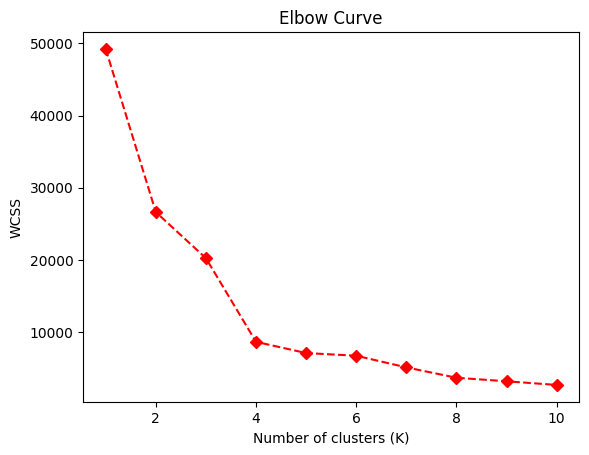

In [54]:
# ploting wcss against k to find optimal k value
plt.plot(k, list_wcss, 'rD--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

optimal clusters, K = 4

### Segmentation Process

Plotted the density of RFM scores to understand the distribution of customer values.

<ipython-input-55-662959a8af40>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RFM['RFM_Score'], shade=True, color="blue")


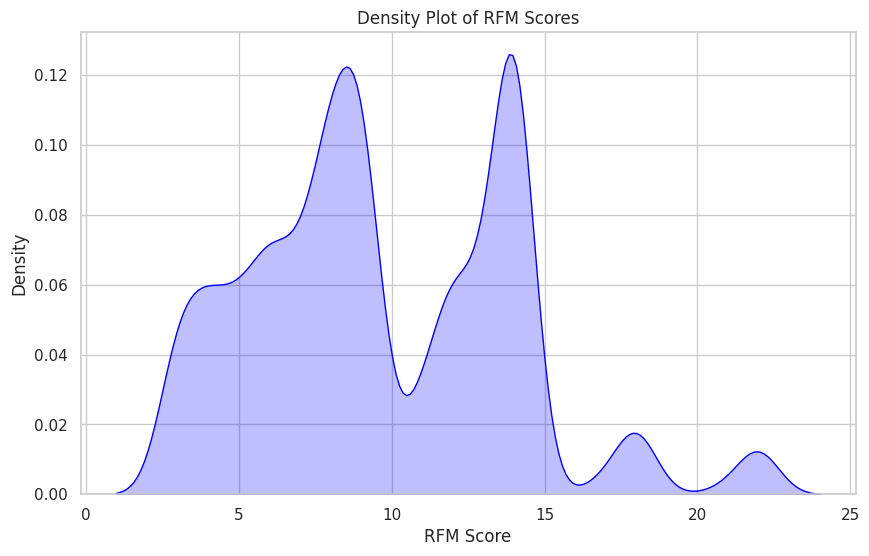

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the density function of RFM_Score
plt.figure(figsize=(10, 6))
sns.kdeplot(RFM['RFM_Score'], shade=True, color="blue")

# Add titles and labels
plt.title('Density Plot of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Density')

# Show the plot
plt.show()


*   **Numeric Segments (Seg_Num)**: Divided customers into four segments using bin ranges and assigned numeric labels (4, 3, 2, 1) based on their RFM score.
*   **Descriptive Labels (Segment_Label)**: Assigned descriptive labels to each segment (e.g., 'Basic Customer', 'Standard Customer', 'Prime Customer', 'Elite Customer') based on the RFM score ranges.

In [84]:
# segmenting each customer into different segments based on their RFM scores

RFM['Seg_Num'] = pd.cut(RFM['RFM_Score'], bins= [0, 6, 11, 17, 25],
                               labels= [4,3,2,1]) # getting Segment_Number for each customer

RFM['Segment_Label'] = pd.cut(RFM['RFM_Score'], bins= [0, 6, 11, 17, 25],
                              labels= ['Basic Customer', 'Standard Customer',
                                       'Prime Customer', 'Elite Customer']) # getting Segment_Label for each customer

RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,001-10-4098,6,12,4150.701126,4,4,6,446,14,2,Prime Customer,Yes,No
1,001-15-9190,43,4,696.823080,3,1,1,311,5,4,Basic Customer,Yes,No
2,001-18-5250,1,11,3191.473809,4,4,6,446,14,2,Prime Customer,Yes,No
3,001-30-4678,59,8,1808.744042,3,2,3,323,8,3,Standard Customer,Yes,No
4,001-47-2621,32,9,2392.049450,3,2,3,323,8,3,Standard Customer,Yes,No


1.   **Elite Customers**:
     *   **Characteristics**: These customers have the highest recency, frequency, and monetary scores. They are highly engaged, make frequent purchases, and spend the most.
     *   **Strategy**: Offer premium services and exclusive rewards to maintain their loyalty and continue engaging them at a high level.
2.   **Prime Customers:**
     *   **Characteristics**: These customers also score high in recency, frequency, and monetary values, but not as high as Elite Customers. They are very valuable and engaged.
     *   **Strategy**: Provide targeted promotions and loyalty programs to boost their engagement further and potentially increase their spending.
3.   **Standard Customers:**
     *   **Characteristics**: These customers have moderate scores across recency, frequency, and monetary values. They are engaged but not as high-value as Prime or Elite Customers.
     *   **Strategy**: Implement strategies to enhance their engagement, such as loyalty programs and personalized promotions to increase their transaction frequency and spend.
4.   **Basic Customers:**
     *   **Characteristics**: These customers have lower scores in recency, frequency, and monetary values. They are less engaged or spend less compared to other segments.
     *   **Strategy**: Focus on re-engagement efforts with targeted offers and personalized outreach to encourage more frequent transactions and higher spending.

In [87]:
# understanding the different segment of customers with median value
RFM.groupby('Segment_Label')[['Recency', 'Frequency', 'Monetary']].median().round().reset_index()

<ipython-input-87-b7a4624bebcd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  RFM.groupby('Segment_Label')[['Recency', 'Frequency', 'Monetary']].median().round().reset_index()


,Segment_Label,Recency,Frequency,Monetary
0,Basic Customer,87.0,2.0,603.0
1,Standard Customer,27.0,7.0,1866.0
2,Prime Customer,14.0,12.0,3340.0
3,Elite Customer,10.0,16.0,4643.0


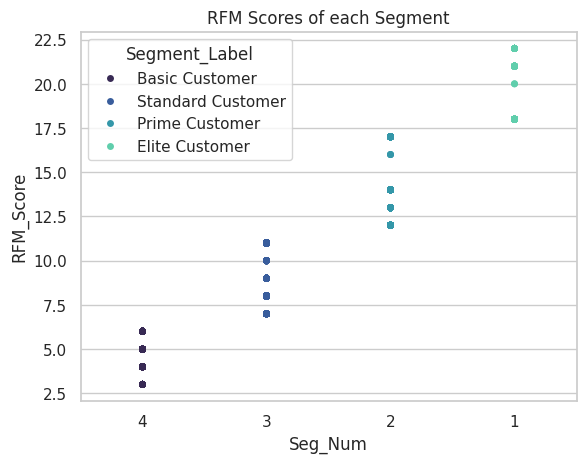

In [88]:
# visualizing the RFM Scores of different segment of customers using strip plot
sns.stripplot(x= 'Seg_Num', y= 'RFM_Score', data= RFM, hue= 'Segment_Label', palette= 'mako', jitter=False)
plt.title('RFM Scores of each Segment')
plt.show()

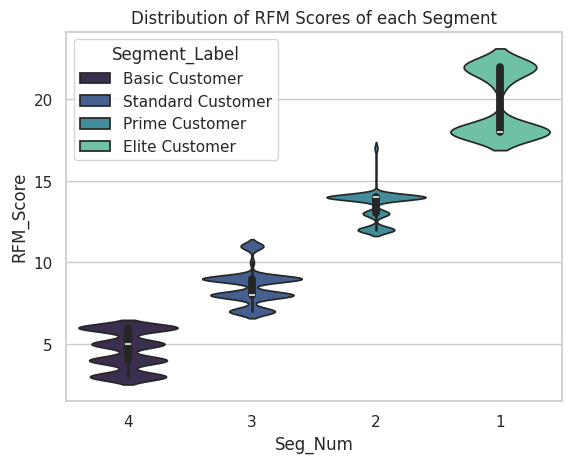

In [89]:
# visualizing the distribution of different segment of customers with their RFM score using violin plot
sns.violinplot(x= 'Seg_Num', y= 'RFM_Score', data= RFM, hue= 'Segment_Label', palette= 'mako')
plt.title('Distribution of RFM Scores of each Segment')
plt.show()

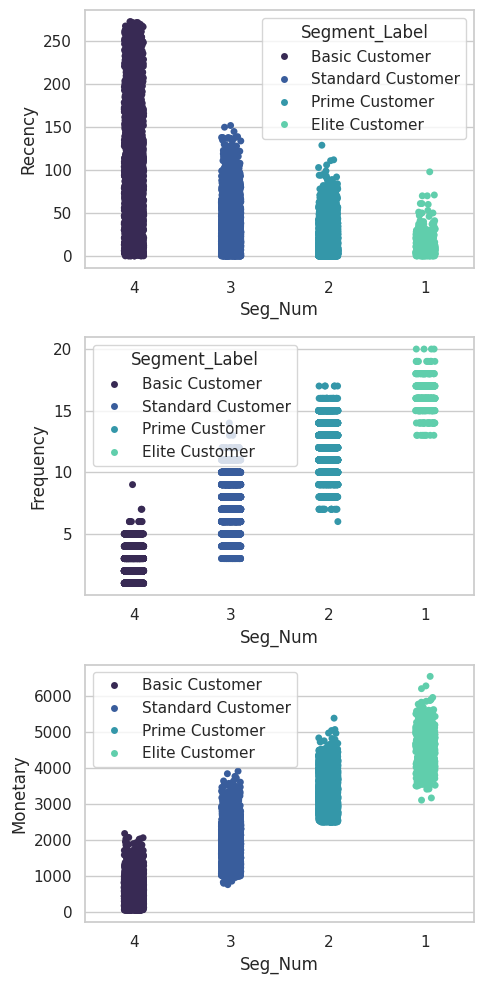

In [90]:
# visualizing the different segment of customers and thier recency, frequency and monetary values using strip plot
fig, axis = plt.subplots(3,1, figsize= (5,10))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.stripplot(x= 'Seg_Num', y= feature, data= RFM, hue= 'Segment_Label', palette= 'mako', ax= axis[i])

plt.legend()
plt.tight_layout()
plt.show()

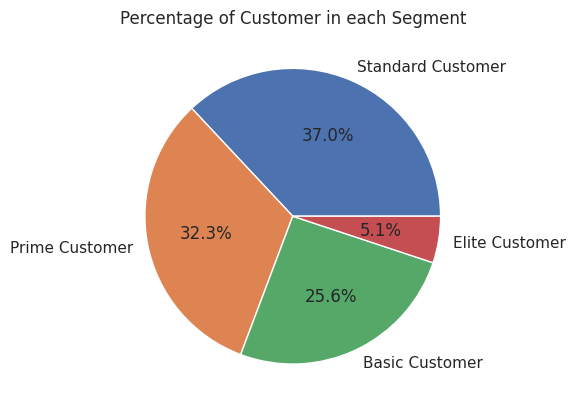

In [91]:
# knowing the percentage of each segment of customers using pie chart
segment_count = RFM['Segment_Label'].value_counts()

plt.pie(segment_count.values, labels= segment_count.index, autopct='%1.1f%%')
plt.title('Percentage of Customer in each Segment')
plt.show()

# Present Data

In [92]:
# taking the second part of data that have only last 3 months of transaction

df_part2 = Marketing_Agency_data.copy() # creating copy
df_part2.set_index('Transaction_Date', inplace= True) # setting Date as index

df_part2 = df_part2.loc['2023-10-02':] # slicing the data
df_part2.reset_index(inplace= True) # resetting index

In [93]:
# Convert 'Transaction_Date' to datetime, coercing errors
df_part2['Transaction_Date'] = pd.to_datetime(df_part2['Transaction_Date'], errors='coerce')

In [94]:
# viewing the data of df_part2
df_part2.head()

,Transaction_Date,CustomerID,Age,Gender,Income_Level,Source,Purchase_Amount,Website_Visits,Avg_Session_Duration,Pages_Viewed_per_Visit,Rating,Gender_num,Source_num,Income_Level_num
0,2023-10-02,610-31-3372,47,Female,Low,TikTok,196.303059,11,72.814893,7.708583,4.392602,0,4,0
1,2023-10-02,331-63-5599,30,Non-Binary,Low,YouTube,275.795446,36,72.347235,6.320538,1.227995,2,5,0
2,2023-10-02,414-06-0371,35,Female,Low,Display,449.652278,9,48.592837,2.027362,3.247252,0,3,0
3,2023-10-02,479-02-8859,42,Non-Binary,Medium,YouTube,189.675342,97,103.556580,3.413386,1.054029,2,5,1
4,2023-10-02,456-78-5764,25,Male,Low,Search,424.010573,68,74.240208,7.847172,4.013436,1,2,0


# Churn Analysis

In [95]:
# knowing the number of customers in df_part2
df_part2['CustomerID'].nunique()

8525

In [96]:
# getting the number of customers in part1 and part2
part1_customer = df_part1['CustomerID'].sort_values().unique()
part2_customer = df_part2['CustomerID'].sort_values().unique()

In [97]:
# finding how many new customers in part2

New_customers = [] # empty list to store new customers ID

for i in part2_customer:
    if i in part1_customer: # checking customer of part2 data in part1 data
        pass

    else:
        New_customers.append(i) # else appending customer ID to New_customers

print(f'Total Number of New Customers: {len(New_customers)}')

Total Number of New Customers: 153


In [98]:
# finding how many old customers made transaction in last three months

R_next_3months = [] # empty list to store customer ID

for i in part1_customer:
    if i in part2_customer: # checking customer of part1 data in part2 data
        R_next_3months.append('Yes') # if true append Yes

    else:
        R_next_3months.append('No') # else append No

RFM['R_Next_3Months'] =  R_next_3months # adding the new feature variable

In [99]:
# viewing RFM dataframe
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,001-10-4098,6,12,4150.701126,4,4,6,446,14,2,Prime Customer,Yes,No
1,001-15-9190,43,4,696.823080,3,1,1,311,5,4,Basic Customer,Yes,No
2,001-18-5250,1,11,3191.473809,4,4,6,446,14,2,Prime Customer,Yes,No
3,001-30-4678,59,8,1808.744042,3,2,3,323,8,3,Standard Customer,Yes,No
4,001-47-2621,32,9,2392.049450,3,2,3,323,8,3,Standard Customer,Yes,No


In [100]:
# getting the counts of how many old customers made transaction in last three months
RFM['R_Next_3Months'].value_counts()

,count
R_Next_3Months,
Yes,8372
No,1475


**Determine Churn Status Based on Conditions:**

*   **Condition 1**: Recent Activity and Continued Engagement
    *   If a customer has a recency of 90 days or less (indicating recent activity) and has been active in the last three months, they are marked as 'No' churn risk (still engaged).
*   **Condition 2**: Recent Activity but Not Active in Last 3 Months
    *   If a customer has a recency of 90 days or less but hasn’t been active in the last three months:
         *   If their frequency is 15 or less, they are considered 'High Risk' for churn (less frequent activity).
         *   Otherwise, they are considered 'Low Risk'.
*   **Condition 3**: Less Recent Activity but Still Active in Last 3 Months
    *   If a customer’s recency is greater than 90 days (less recent) but has been active in the last three months:
         *   If their frequency is greater than 15, they are marked as 'No' *   *   churn risk (they still engage despite being less recent).
          Otherwise, they are marked as 'Low Risk'.
*   **Condition 4**: Less Recent Activity and Not Active in Last 3 Months
    *   If a customer’s recency is greater than 90 days and they haven’t been active in the last three months, they are considered 'Yes' churn risk (they are both less recent and inactive).

In [101]:
# finding whether the customer is churned or not based on conditions

Churn = [] # empty list to store the status of churn of customer

for i,j in enumerate(RFM['CustomerID']):

    if RFM['Recency'][i] <= 90 and RFM['R_Next_3Months'][i] == 'Yes':
        Churn.append('No')

    elif RFM['Recency'][i] <= 90 and RFM['R_Next_3Months'][i] == 'No':

        if RFM['Frequency'][i] <= 15:
            Churn.append('High Risk')

        else:
            Churn.append('Low Risk')

    elif RFM['Recency'][i] > 90 and RFM['R_Next_3Months'][i] == 'Yes':

        if RFM['Frequency'][i] > 15:
            Churn.append('No')

        else:
            Churn.append('Low Risk')

    elif RFM['Recency'][i] > 90 and RFM['R_Next_3Months'][i] == 'No':
        Churn.append('Yes')

RFM['Churn'] = Churn # adding the new feature variable churn

In [102]:
# viewing RFM dataframe
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,001-10-4098,6,12,4150.701126,4,4,6,446,14,2,Prime Customer,Yes,No
1,001-15-9190,43,4,696.823080,3,1,1,311,5,4,Basic Customer,Yes,No
2,001-18-5250,1,11,3191.473809,4,4,6,446,14,2,Prime Customer,Yes,No
3,001-30-4678,59,8,1808.744042,3,2,3,323,8,3,Standard Customer,Yes,No
4,001-47-2621,32,9,2392.049450,3,2,3,323,8,3,Standard Customer,Yes,No


In [103]:
# getting the counts of different classes in churn
RFM['Churn'].value_counts()

,count
Churn,
No,7553
High Risk,935
Low Risk,840
Yes,519


**No:** 7,553 customers


*   These customers are considered not at risk of churning. They either have recent activity and continued engagement or are still active despite having less recent activity.

**High Risk:** 935 customers

*   These customers are categorized as high risk of churning. They have recent activity but haven’t been engaged in the past three months, and they have low transaction frequency.

**Low Risk:** 840 customers

*   These customers are classified as low risk of churning. They have recent activity and continued engagement or have high transaction frequency despite being less recent.

**Yes:** 519 customers

*   These customers are considered to be at high risk of churning. They have not been active recently and have not made transactions in the last three months.

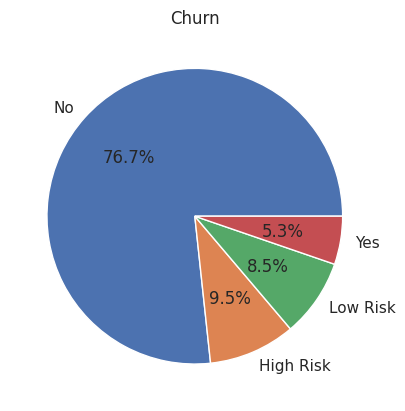

In [104]:
# knowing the percentage of each class in churn using pie chart
churn_count = RFM['Churn'].value_counts()

plt.pie(churn_count.values, labels= churn_count.index, autopct='%1.1f%%')
plt.title('Churn')
plt.show()

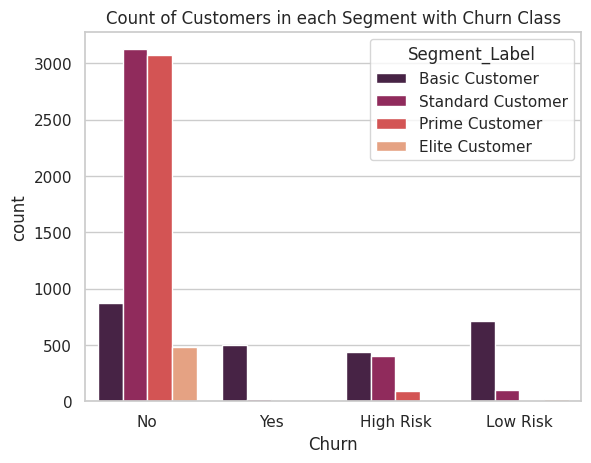

In [105]:
# visualizing different segment of customers and thier churn class
sns.countplot(x= 'Churn', data= RFM, hue= 'Segment_Label', palette= 'rocket')
plt.title('Count of Customers in each Segment with Churn Class')
plt.show()

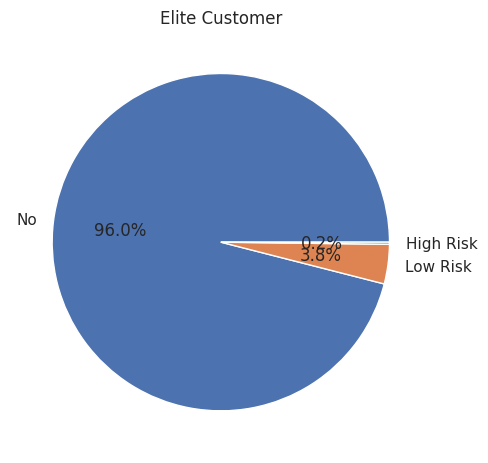

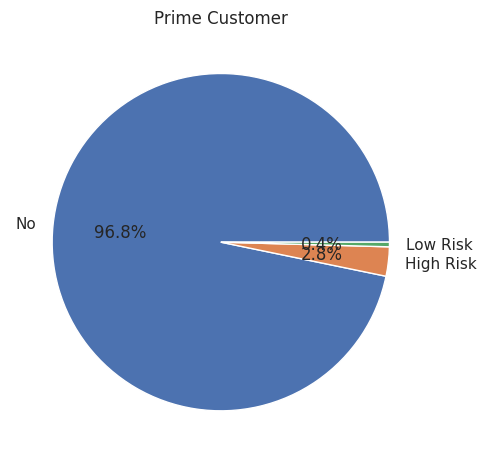

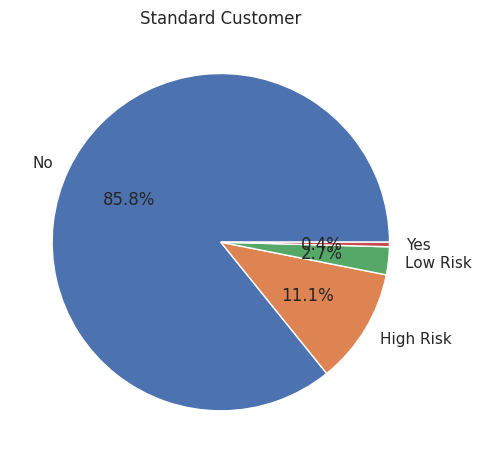

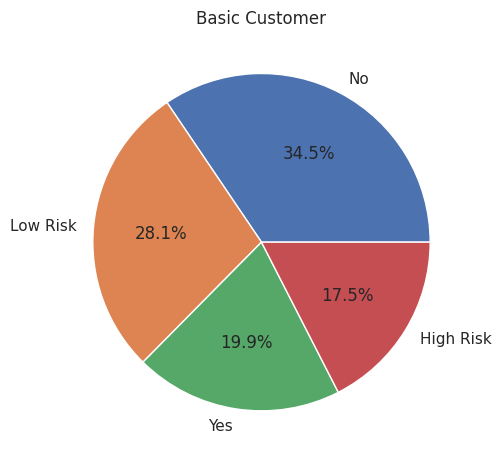

In [107]:
# visualizing and knowing the percentage of churn class for different segment of customers
segment_list = RFM['Segment_Label'].unique().sort_values(ascending= False)

for i in segment_list:
    segment = RFM[['Segment_Label','Churn']][RFM.Segment_Label == i]
    segment_churn = segment.value_counts().to_frame().reset_index().rename(columns= {0:'count'})

    plt.pie(x= segment_churn['count'], labels= segment_churn['Churn'], autopct= '%.1f%%')
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [110]:
# Grouping the segment and churn counts together
churn_class_counts = RFM.groupby(['Segment_Label', 'Churn']).size().reset_index().rename(columns={0: 'Churn_Class_Count'})

# Treemap visualization
fig = px.treemap(churn_class_counts, path=['Segment_Label', 'Churn'], values='Churn_Class_Count',
                 title='Customer Segments and Churn Counts by Churn Class')
fig.show()


<ipython-input-110-cdf0777e90ec>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_class_counts = RFM.groupby(['Segment_Label', 'Churn']).size().reset_index().rename(columns={0: 'Churn_Class_Count'})
/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

In [111]:
# converting the datatype of categorical feature from int to object
RFM[['CustomerID', 'Seg_Num', 'Segment_Label']] = RFM[['CustomerID', 'Seg_Num', 'Segment_Label']].astype(object)

### creating correlation matrix for the numeric feature variables

In [113]:
# Select only numeric columns
numeric_columns = RFM.select_dtypes(include=[int, float])

# Compute the correlation matrix for numeric columns
corr = numeric_columns.corr()

# Display the correlation matrix
corr

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Recency,1.000000,-0.536244,-0.515699,-0.930181,-0.383679,-0.473201,-0.605362
Frequency,-0.536244,1.000000,0.959150,0.529943,0.885447,0.894527,0.940307
Monetary,-0.515699,0.959150,1.000000,0.510033,0.848651,0.933642,0.942442
R_Score,-0.930181,0.529943,0.510033,1.000000,0.392658,0.470712,0.622722
F_Score,-0.383679,0.885447,0.848651,0.392658,1.000000,0.805068,0.907628
M_Score,-0.473201,0.894527,0.933642,0.470712,0.805068,1.000000,0.952252
RFM_Score,-0.605362,0.940307,0.942442,0.622722,0.907628,0.952252,1.000000


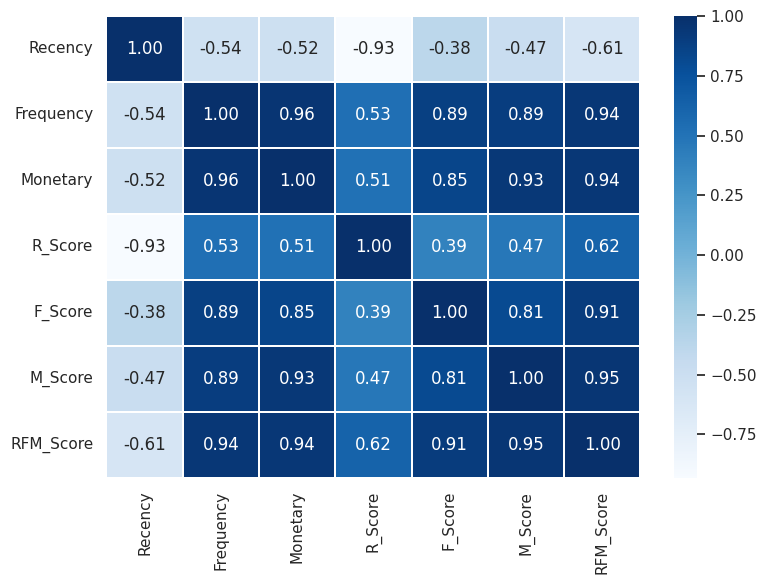

In [114]:
# visualizing the correlation between numeric feature variables using heat map
plt.figure(figsize= (8,6))
sns.heatmap(data= corr, fmt= '.2f', linewidths= 0.2, linecolor= 'white', cmap= 'Blues', annot= True)
plt.tight_layout()
plt.show()

1.   **Recency:**

Strong negative correlation with R_Score (-0.93), meaning that as Recency increases (more days since the last purchase), the Recency score decreases.
Moderately negative correlation with Frequency (-0.54) and Monetary (-0.52), suggesting that customers with higher Recency tend to make fewer purchases and spend less money.
Strong negative correlation with RFM_Score (-0.61), meaning that higher Recency (longer time since last purchase) tends to lower the overall RFM score.

2.   **Frequency**:

Strong positive correlation with Monetary (0.96), indicating that customers who make more purchases also tend to spend more money.
High positive correlation with F_Score (0.89), M_Score (0.89), and RFM_Score (0.94), meaning that customers with higher purchase frequency tend to score higher overall.

3.   **Monetary**:

High positive correlation with Frequency (0.96) and M_Score (0.93), confirming that higher spending is associated with more frequent purchases and higher monetary scores.
Strong correlation with RFM_Score (0.94), indicating that customers who spend more tend to have higher overall RFM scores.

4.   **R_Score**:

Strong positive correlation with RFM_Score (0.62), meaning that higher Recency scores (more recent purchases) contribute positively to the overall RFM score.
Moderate correlations with Frequency (0.53) and Monetary (0.51), suggesting some association between recency and customer spending or purchase frequency.

5.   **F_Score** and **M_Score**:

Both have strong positive correlations with the overall RFM_Score (0.91 and 0.95, respectively), showing their significance in determining the total score.

The matrix confirms that **RFM_Score** is most influenced by **Frequency**, **Monetary**, and their corresponding scores, but **Recency** has a notable negative influence, especially when it's high.

In [115]:
RFM['Seg_Num'] = RFM['Seg_Num'].fillna(0).astype(int)

# Convert a specific column to integers
RFM['Seg_Num'] = RFM['Seg_Num'].astype(int)

<ipython-input-115-99f4aa31cc56>:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [116]:
numeric_columns = RFM.select_dtypes(include=[int, float])

# getting the variance in each features
var = numeric_columns.var()
var

,0
Recency,2.656025e+03
Frequency,1.995618e+01
Monetary,1.649448e+06
R_Score,8.554485e-01
F_Score,2.788989e+00
M_Score,5.172373e+00
RFM_Score,1.812559e+01
Seg_Num,7.548404e-01


**This help us understand how dispersed or concentrated each feature is, which can be useful when fine-tuning the segmentation strategy.**
1.   **Recency (Variance: 2,656.025)** – The high variance indicates a wide range of values for customer recency, meaning that customers vary greatly in how recently they have made a purchase.

2.   **Frequency (Variance: 19.956)** – A moderate variance suggests that there is some variability in how often customers make purchases, but it’s not as dispersed as recency.

3.   **Monetary (Variance: 1,649,448.000)** – The extremely high variance shows a significant spread in customer spending. This means there are a few high-spending customers who drive the variance up, while others may spend far less.

4.   **R_Score (Variance: 0.855)** – The low variance in R_Score suggests that most customers have similar recency scores.

5.   **F_Score (Variance: 2.789)** – This indicates moderate variability in how frequently customers are purchasing, which aligns with the moderate variance in frequency.

6.   **M_Score (Variance: 5.172)** – This shows a moderate spread in monetary scores, which reflects the large variability in customer spending behavior.

7.   **RFM_Score (Variance: 18.126**) – The overall RFM score variance is moderate, indicating that there are distinct customer segments, but the spread isn’t as large as in individual dimensions like monetary value.

8.   **Seg_Num (Variance: 0.761)** – A low variance suggests that most customers belong to similar segments, with less spread in segment membership.


1.   **Multicollinearity**:
    *   Monetary and M_Score are highly correlated (correlation ≈ 0.93). You may consider dropping one of them.
    *   RFM_Score is highly correlated with Frequency, Monetary, and M_Score. Since RFM_Score is a composite of the other scores, you might consider dropping it if you keep R_Score, F_Score, and M_Score.

2.   **Variance**:
    *   Seg_Num has a very low variance (0.76), indicating it might not contribute much variability. This feature might be less useful if it doesn’t add value to your model.






In [117]:
# dropping unwanted and multicollinearity feature variables
df_segment = RFM.copy() # copy of RFM dataframe
df_segment.drop(['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Value', 'Seg_Num'], axis= 1, inplace= True) # dropping
df_segment.head()

,Recency,Frequency,Monetary,Segment_Label,R_Next_3Months,Churn
0,6,12,4150.701126,Prime Customer,Yes,No
1,43,4,696.823080,Basic Customer,Yes,No
2,1,11,3191.473809,Prime Customer,Yes,No
3,59,8,1808.744042,Standard Customer,Yes,No
4,32,9,2392.049450,Standard Customer,Yes,No


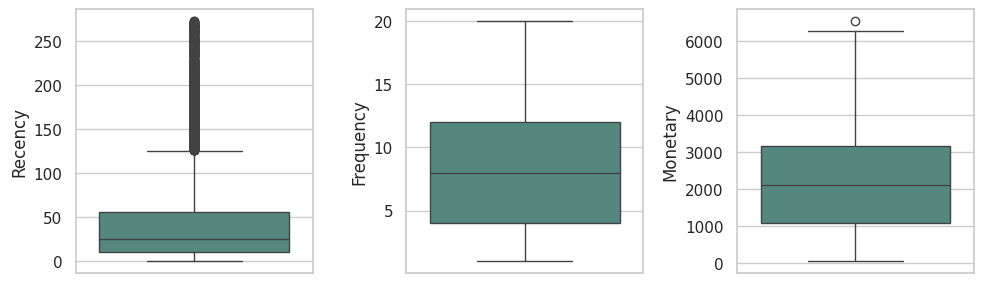

In [118]:
# visualizing and getting know whether independent feature variables having outlier using box plot
num_features = df_segment.select_dtypes(exclude= 'object').columns

fig, axis = plt.subplots(1,3,figsize=(10,3))
axis = axis.flatten()

for i,feature in enumerate(num_features):
    sns.boxplot(y= feature, data= df_segment, ax= axis[i], color= '#4c9085')

plt.tight_layout()
plt.show()

In [119]:
# getting the feature variables having outliers
outliers_features = ['Recency', 'Monetary']

In [120]:
# removing outliers using zscore
from scipy import stats
zscore_recency = np.abs(stats.zscore(df_segment['Recency'])) # calculating Z-score for recency
zscore_monetary = np.abs(stats.zscore(df_segment['Monetary'])) # calculating Z-score for monetary

threshold = 3 # setting threshold value

outliers_recency = list(np.where(zscore_recency>threshold)[0]) # getting outliers index in recency
outliers_monetary = list(np.where(zscore_monetary>threshold)[0]) # getting outliers index in monetary

outliers_indices = list(set(outliers_recency + outliers_monetary)) # creating a set for getting unique index of outliers
outliers_indices.sort() # sorting the list

df_segment = df_segment.drop(df_segment.index[outliers_indices]) # dropping outlier records

In [121]:
# encoding categorical variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_segment['R_Next_3Months'] = labelencoder.fit_transform(df_segment['R_Next_3Months'])

### Data Splitting

In [122]:
# Encode categorical target variables as integers
df_segment['Segment_Label'] = labelencoder.fit_transform(df_segment['Segment_Label'])
df_segment['Churn'] = labelencoder.fit_transform(df_segment['Churn'])

In [123]:
# assigning variables for independent and dependent feature variables

X = df_segment.drop(['Segment_Label', 'Churn'], axis= 1) # independent feature variables
y = df_segment[['Segment_Label', 'Churn']] # dependent feature variables

In [124]:
# standardization of independent variables
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [125]:
# splitting data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

### Model Training and Tuning

In [126]:
# importing Multi-Output Classifier since we have two target variables
from sklearn.multioutput import MultiOutputClassifier
# importing GridSearch CV to find optimal set of hyperparameters
from sklearn.model_selection import GridSearchCV
# importing evaluation metrics of classification model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score



#### 1.   Logistic Regression



In [127]:
# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = MultiOutputClassifier(LogisticRegression())

In [128]:
# setting hyperparameters of logistic regression
logreg_params = {
    'estimator__C': [0.1, 1.0, 10.0],
    'estimator__penalty': ['l1', 'l2']
}

In [129]:
# using gridsearch cv to find optimal set of hyperparameters of logistic regression
logreg_gsearch = GridSearchCV(estimator= logreg, param_grid= logreg_params, cv= 5)

# fitting with training data
logreg_gsearch.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/multioutput.py", line 542, in fit
    super().fit(X, Y, sample_weight=sample_weight, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=LogisticRegression()),
             param_grid={'estimator__C': [0.1, 1.0, 10.0],
                         'estimator__penalty': ['l1', 'l2']})

In [130]:
# getting the best hyperparameters of logistic regression
logreg_gsearch.best_params_

{'estimator__C': 10.0, 'estimator__penalty': 'l2'}

In [131]:
# getting best score
logreg_gsearch.best_score_

0.9262648490833003

In [132]:
# building the logistic regression model with best estimators
logreg_model = logreg_gsearch.best_estimator_

In [133]:
# predicting target variables using test data with logistic regression model
y_logreg_predict = logreg_model.predict(X_test)

In [134]:
# getting the evaluation metrics score of logistic regression model for Segmentation
print('Logistic Regression Model: Segmentation \n')

seg_report_logreg = classification_report(y_test['Segment_Label'], y_logreg_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_logreg}')

seg_CM_logreg = confusion_matrix(y_test['Segment_Label'], y_logreg_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_logreg}\n')

seg_AS_log = round(accuracy_score(y_test['Segment_Label'], y_logreg_predict[:,0])*100,2) # Accuracy Score
seg_PS_log = round(precision_score(y_test['Segment_Label'], y_logreg_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_log = round(recall_score(y_test['Segment_Label'], y_logreg_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_log = round(f1_score(y_test['Segment_Label'], y_logreg_predict[:,0], average="weighted")*100,2) # F1 Score

print(f'Accuracy Sore: {seg_AS_log}')
print(f'Precision Score: {seg_PS_log}')
print(f'Recall Score: {seg_RS_log}')
print(f'F1 Score: {seg_F1_log}')

Logistic Regression Model: Segmentation 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       438
           1       0.91      0.86      0.88       113
           2       0.90      0.93      0.92       636
           3       0.92      0.90      0.91       726

    accuracy                           0.92      1913
   macro avg       0.92      0.91      0.91      1913
weighted avg       0.92      0.92      0.92      1913

Confusion Matrix:
 [[413   0   0  25]
 [  0  97  16   0]
 [  0  10 593  33]
 [ 25   0  47 654]]

Accuracy Sore: 91.85
Precision Score: 91.86
Recall Score: 91.85
F1 Score: 91.84


In [135]:
# getting the evaluation metrics score of logistic regression model for Churn Prediction
print('Logistic Regression Model: Churn Prediction \n')

churn_report_logreg = classification_report(y_test['Churn'], y_logreg_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_logreg}')

churn_CM_logreg = confusion_matrix(y_test['Churn'], y_logreg_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_logreg}\n')

churn_AS_log = round(accuracy_score(y_test['Churn'], y_logreg_predict[:,1])*100,2) # Accuracy Score
churn_PS_log = round(precision_score(y_test['Churn'], y_logreg_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_log = round(recall_score(y_test['Churn'], y_logreg_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_log = round(f1_score(y_test['Churn'], y_logreg_predict[:,1], average="weighted")*100,2) # F1 Score

print(f'Accuracy Sore: {churn_AS_log}')
print(f'Precision Score: {churn_PS_log}')
print(f'Recall Score: {churn_RS_log}')
print(f'F1 Score: {churn_F1_log}')

Logistic Regression Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       191
           1       1.00      0.99      0.99       154
           2       1.00      1.00      1.00      1493
           3       1.00      0.99      0.99        75

    accuracy                           1.00      1913
   macro avg       1.00      0.99      0.99      1913
weighted avg       1.00      1.00      1.00      1913

Confusion Matrix:
 [[ 191    0    0    0]
 [   2  152    0    0]
 [   0    0 1493    0]
 [   1    0    0   74]]

Accuracy Sore: 99.84
Precision Score: 99.85
Recall Score: 99.84
F1 Score: 99.84


#### 2.   Random Forest



In [136]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = MultiOutputClassifier(RandomForestClassifier())

In [137]:
# setting hyperparameters of random forest classifier
rf_params = {
    'estimator__criterion':['gini','entropy'],
    'estimator__n_estimators':[100,200],
    'estimator__max_depth':[None,5,10],
    'estimator__max_features':[None,'sqrt','log2'],
}

In [138]:
# using gridsearch cv to find optimal set of hyperparameters of random forest classifier
rf_gsearch = GridSearchCV(estimator= rf, param_grid= rf_params, cv= 5)

# fitting with training data
rf_gsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier()),
             param_grid={'estimator__criterion': ['gini', 'entropy'],
                         'estimator__max_depth': [None, 5, 10],
                         'estimator__max_features': [None, 'sqrt', 'log2'],
                         'estimator__n_estimators': [100, 200]})

In [139]:
# getting the best hyperparameters of random forest classifier
rf_gsearch.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__n_estimators': 100}

In [140]:
# getting best score
rf_gsearch.best_score_

0.9990848818271585

In [141]:
# building the random forest classifier model with best estimators
rf_model = rf_gsearch.best_estimator_

In [142]:
# predicting target variables using test data with random forest classifier model
y_rf_predict = rf_model.predict(X_test)

In [143]:
# getting the evaluation metrics score of random forest classifier model for Segmentation
print('Random Forest Classifier Model: Segmentation \n')

seg_report_rf = classification_report(y_test['Segment_Label'], y_rf_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_rf}')

seg_CM_rf = confusion_matrix(y_test['Segment_Label'], y_rf_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_rf}\n')

seg_AS_rf = round(accuracy_score(y_test['Segment_Label'], y_rf_predict[:,0])*100,2) # Accuracy Score
seg_PS_rf = round(precision_score(y_test['Segment_Label'], y_rf_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_rf = round(recall_score(y_test['Segment_Label'], y_rf_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_rf = round(f1_score(y_test['Segment_Label'], y_rf_predict[:,0], average="weighted")*100,2) # F1 Score

print(f'Accuracy Sore: {seg_AS_rf}')
print(f'Precision Score: {seg_PS_rf}')
print(f'Recall Score: {seg_RS_rf}')
print(f'F1 Score: {seg_F1_rf}')

Random Forest Classifier Model: Segmentation 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00       636
           3       1.00      1.00      1.00       726

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913

Confusion Matrix:
 [[438   0   0   0]
 [  0 113   0   0]
 [  0   0 636   0]
 [  0   0   2 724]]

Accuracy Sore: 99.9
Precision Score: 99.9
Recall Score: 99.9
F1 Score: 99.9


In [144]:
# getting the evaluation metrics score of random forest classifier model for Churn Prediction
print('Random Forest Classifier Model: Churn Prediction \n')

churn_report_rf = classification_report(y_test['Churn'], y_rf_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_rf}')

churn_CM_rf = confusion_matrix(y_test['Churn'], y_rf_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_rf}\n')

churn_AS_rf = round(accuracy_score(y_test['Churn'], y_rf_predict[:,1])*100,2) # Accuracy Score
churn_PS_rf = round(precision_score(y_test['Churn'], y_rf_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_rf = round(recall_score(y_test['Churn'], y_rf_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_rf = round(f1_score(y_test['Churn'], y_rf_predict[:,1], average="weighted")*100,2) # F1 Score

print(f'Accuracy Sore: {churn_AS_rf}')
print(f'Precision Score: {churn_PS_rf}')
print(f'Recall Score: {churn_RS_rf}')
print(f'F1 Score: {churn_F1_rf}')

Random Forest Classifier Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00      1493
           3       1.00      1.00      1.00        75

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913

Confusion Matrix:
 [[ 191    0    0    0]
 [   0  154    0    0]
 [   0    0 1493    0]
 [   0    0    0   75]]

Accuracy Sore: 100.0
Precision Score: 100.0
Recall Score: 100.0
F1 Score: 100.0


#### 3.   K-Nearest Neighbor




In [145]:
# importing K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = MultiOutputClassifier(KNeighborsClassifier())

In [146]:
# setting hyperparameters of KNN Classifier
knn_params = {
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}

In [147]:
# using gridsearch cv to find optimal set of hyperparameters of KNN classifier
knn_gsearch = GridSearchCV(estimator= knn, param_grid= knn_params, cv= 5)

# fitting with training data
knn_gsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=KNeighborsClassifier()),
             param_grid={'estimator__metric': ['euclidean', 'manhattan'],
                         'estimator__n_neighbors': [3, 5, 7],
                         'estimator__weights': ['uniform', 'distance']})

In [148]:
# getting the best hyperparameters of KNN classifier
knn_gsearch.best_params_

{'estimator__metric': 'manhattan',
 'estimator__n_neighbors': 3,
 'estimator__weights': 'distance'}

In [149]:
# getting best score
knn_gsearch.best_score_

0.9771219601858621

In [150]:
# building the KNN classifier model with best estimators
knn_model = knn_gsearch.best_estimator_

In [151]:
# predicting target variables using test data with KNN classifier model
y_knn_predict = knn_model.predict(X_test)

In [152]:
# getting the evaluation metrics score of KNN classifier model for Segmentation
print('K Nearest Neighbor Classifier Model: Segmentation \n')

seg_report_knn = classification_report(y_test['Segment_Label'], y_knn_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_knn}')

seg_CM_knn = confusion_matrix(y_test['Segment_Label'], y_knn_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_knn}\n')

seg_AS_knn = round(accuracy_score(y_test['Segment_Label'], y_knn_predict[:,0])*100,2) # Accuracy Score
seg_PS_knn = round(precision_score(y_test['Segment_Label'], y_knn_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_knn = round(recall_score(y_test['Segment_Label'], y_knn_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_knn = round(f1_score(y_test['Segment_Label'], y_knn_predict[:,0], average="weighted")*100,2) # F1 Score

print(f'Accuracy Sore: {seg_AS_knn}')
print(f'Precision Score: {seg_PS_knn}')
print(f'Recall Score: {seg_RS_knn}')
print(f'F1 Score: {seg_F1_knn}')

K Nearest Neighbor Classifier Model: Segmentation 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       438
           1       0.98      0.98      0.98       113
           2       0.98      0.99      0.98       636
           3       0.98      0.98      0.98       726

    accuracy                           0.98      1913
   macro avg       0.98      0.98      0.98      1913
weighted avg       0.98      0.98      0.98      1913

Confusion Matrix:
 [[428   0   0  10]
 [  0 111   2   0]
 [  0   2 628   6]
 [  1   0  12 713]]

Accuracy Sore: 98.27
Precision Score: 98.28
Recall Score: 98.27
F1 Score: 98.28


In [153]:
# getting the evaluation metrics score of KNN classifier model for Churn Prediction
print('K Nearest Neighbor Classifier Model: Churn Prediction \n')

churn_report_knn = classification_report(y_test['Churn'], y_knn_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_knn}')

churn_CM_knn = confusion_matrix(y_test['Churn'], y_knn_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_knn}\n')

churn_AS_knn = round(accuracy_score(y_test['Churn'], y_knn_predict[:,1])*100,2) # Accuracy Score
churn_PS_knn = round(precision_score(y_test['Churn'], y_knn_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_knn = round(recall_score(y_test['Churn'], y_knn_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_knn = round(f1_score(y_test['Churn'], y_knn_predict[:,1], average="weighted")*100,2) # F1 Score

print(f'Accuracy Sore: {churn_AS_knn}')
print(f'Precision Score: {churn_PS_knn}')
print(f'Recall Score: {churn_RS_knn}')
print(f'F1 Score: {churn_F1_knn}')

K Nearest Neighbor Classifier Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       0.99      0.97      0.98       154
           2       1.00      1.00      1.00      1493
           3       1.00      0.99      0.99        75

    accuracy                           1.00      1913
   macro avg       0.99      0.99      0.99      1913
weighted avg       1.00      1.00      1.00      1913

Confusion Matrix:
 [[ 191    0    0    0]
 [   0  150    4    0]
 [   0    2 1491    0]
 [   1    0    0   74]]

Accuracy Sore: 99.63
Precision Score: 99.63
Recall Score: 99.63
F1 Score: 99.63


### Model Evaluation

In [154]:
# creating a table with segmentation evaluation metrics score of different machine learning models

seg_metrics_dict = {'Models': ['Logistic Reggression', 'Random Forest Classifier', 'K Nearest Neighbor Classifier'],
               'Seg_Accuracy Score': [seg_AS_log, seg_AS_rf, seg_AS_knn],
               'Seg_Precision Score': [seg_PS_log, seg_PS_rf, seg_PS_knn],
               'Seg_Recall Score': [seg_RS_log, seg_RS_rf, seg_RS_knn],
               'Seg_F1 Score': [seg_F1_log, seg_F1_rf, seg_F1_knn]}

seg_metrics_df = pd.DataFrame(seg_metrics_dict)
seg_metrics_df

,Models,Seg_Accuracy Score,Seg_Precision Score,Seg_Recall Score,Seg_F1 Score
0,Logistic Reggression,91.85,91.86,91.85,91.84
1,Random Forest Classifier,99.90,99.90,99.90,99.90
2,K Nearest Neighbor Classifier,98.27,98.28,98.27,98.28


In [155]:
# creating a table with churn prediction evaluation metrics score of different machine learning models

churn_metrics_dict = {'Models': ['Logistic Reggression', 'Random Forest Classifier', 'K Nearest Neighbor Classifier'],
               'Churn_Accuracy Score': [churn_AS_log, churn_AS_rf, churn_AS_knn],
               'Churn_Precision Score': [churn_PS_log, churn_PS_rf, churn_PS_knn],
               'Churn_Recall Score': [churn_RS_log, churn_RS_rf, churn_RS_knn],
               'Churn_F1 Score': [churn_F1_log, churn_F1_rf, churn_F1_knn]}

churn_metrics_df = pd.DataFrame(churn_metrics_dict)
churn_metrics_df

,Models,Churn_Accuracy Score,Churn_Precision Score,Churn_Recall Score,Churn_F1 Score
0,Logistic Reggression,99.84,99.85,99.84,99.84
1,Random Forest Classifier,100.00,100.00,100.00,100.00
2,K Nearest Neighbor Classifier,99.63,99.63,99.63,99.63


<ipython-input-156-e5ef34954520>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-156-e5ef34954520>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-156-e5ef34954520>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-156-e5ef34954520>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-156-e5ef34954520>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

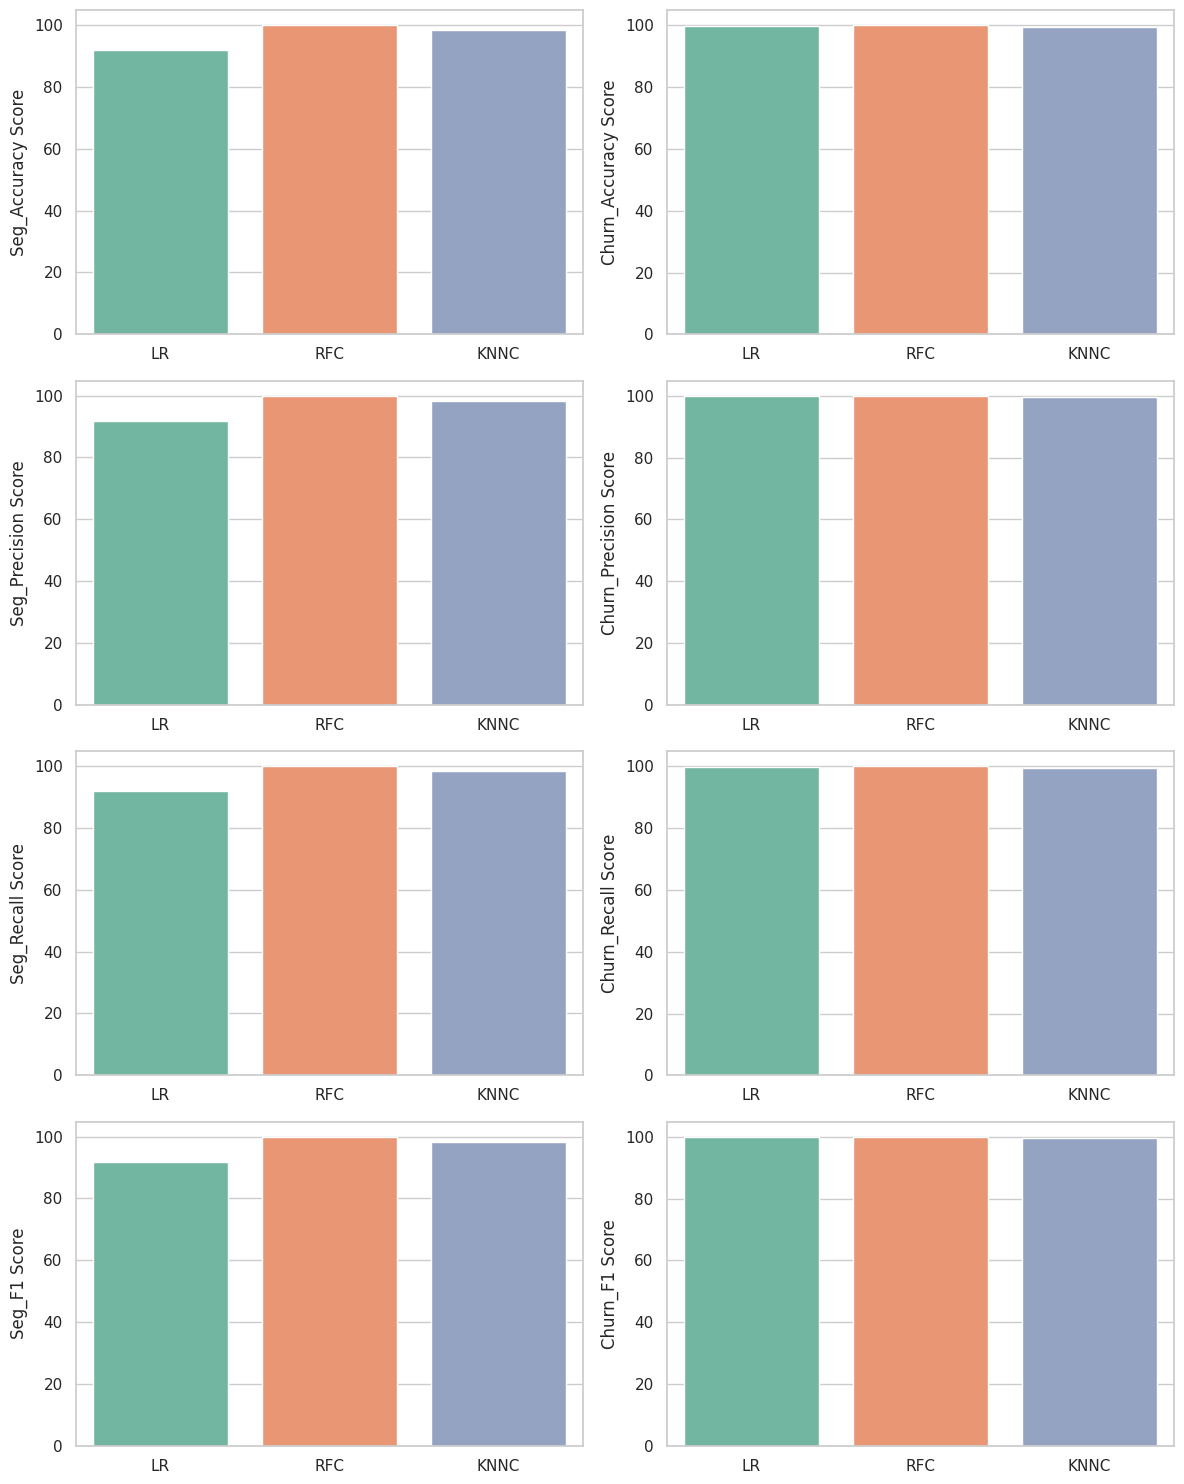

In [156]:
# visualizing and comparing evaluation metrics of different machine learning models
fig, axis = plt.subplots(4,2, figsize= (12,15))
axis = axis.flatten()

seg_metrics = ['Seg_Accuracy Score', 'Seg_Precision Score', 'Seg_Recall Score', 'Seg_F1 Score']
churn_metrics = ['Churn_Accuracy Score', 'Churn_Precision Score', 'Churn_Recall Score', 'Churn_F1 Score']
models = ['LR', 'RFC', 'KNNC']
prediction = ['Segmentation', 'Churn']

i=0
for seg_column in seg_metrics:
    sns.barplot(x= models, y= seg_column, data= seg_metrics_df, palette= 'Set2', ax= axis[i])
    i+=2

j=1
for churn_column in churn_metrics:
    sns.barplot(x= models, y= churn_column, data= churn_metrics_df, palette= 'Set2', ax= axis[j])
    j+=2

plt.tight_layout()
plt.show()

The dataset is imbalanced, so will consider F1 Score for the model evaluation

After evaluating multiple machine learning models, the Random Forest Classifier exhibited 99.90% F1 Score in customer segmentation and 100% F1 Score in churn prediction.